In [1]:
import gym
from ppo import PPOAgent
from ActionNormalizer import (ActionNormalizer)
import matplotlib.pyplot as plt

### CartPole-v1

Playing with learning_rates and entropy coeff and vf_coeff:

Score 1: actor_lr =5e-4, critic_lr 3e-4, vf_coef=0.5, entropy_coef=0.005, rollout_len=25, batch=4
Score 2: 1e-4 both actor_lr and critic_lr, same
Score 3: 1e-4, 3e-3, batch=20, epoch=10, vf_coef=0.5, entropy_coef=0.005

THEN playing with rollout and batch size:

Score 4: rollout_len=2048 (Paper) and batch=4
Score 5: rollout_len=2048 (Paper) and batch=8
Score 6: rollout_len=2048 (Paper) and batch=16
Score 7: rollout_len=2048 (Paper) and batch=32
Score 8: rollout_len=2048 (Paper) and batch=64

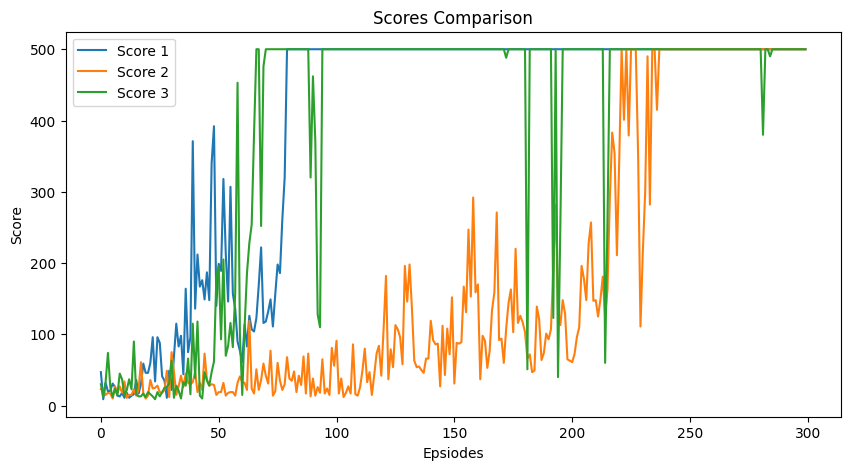

In [6]:
import csv
import matplotlib.pyplot as plt

# Specify the filename
filename = "Scores_completed_new.csv"

# Initialize lists to store the scores
scores = {f"score{i}": [] for i in range(1, 4)}

# Read the CSV file
with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Skip the header
    next(csvreader)
    
    # Read each row and append the values to the lists
    for row in csvreader:
        for i in range(1, 4):
            if len(row) >= i:  # Check if the row has enough columns
                try:
                    scores[f"score{i}"].append(float(row[i - 1]))
                except ValueError:
                    scores[f"score{i}"].append(float('nan'))  # Handle missing or invalid values

# Plot the scores
plt.figure(figsize=(10, 5))
for i in range(1, 4):
    plt.plot(scores[f"score{i}"], label=f'Score {i}')
plt.title('Scores Comparison')
plt.xlabel('Epsiodes')
plt.ylabel('Score')
plt.legend()
plt.show()


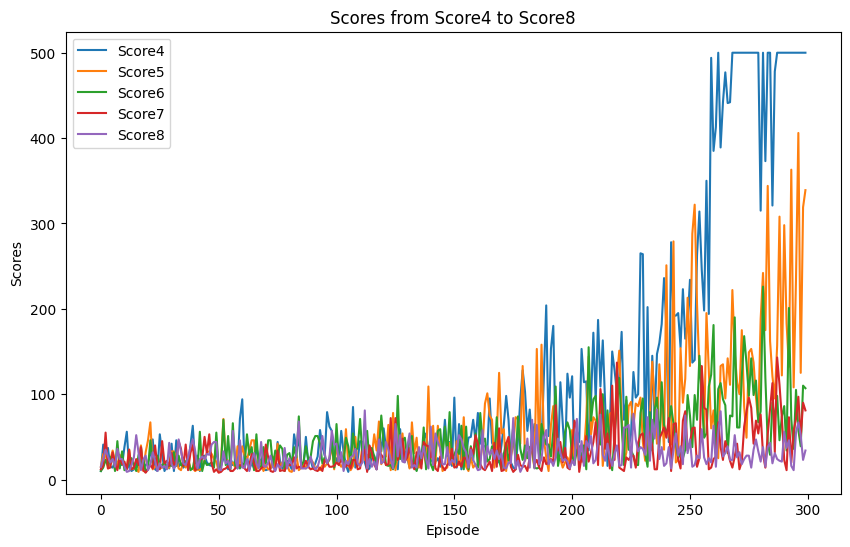

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = 'scores4-9.csv'  # Adjust this path as necessary
data = pd.read_csv(file_path)

# Step 2: Extract columns
scores = data[['Score4', 'Score5', 'Score6', 'Score7', 'Score8']]

# Step 3: Plot the values
plt.figure(figsize=(10, 6))
for column in scores.columns:
    plt.plot(scores.index, scores[column], label=column)

# Add titles and labels
plt.title('Scores from Score4 to Score8')
plt.xlabel('Episode')
plt.ylabel('Scores')
plt.legend()

# Show plot
plt.show()


### MountainCarContinuous-v0

score1: entropy=0.003, vf_coef=0.5, rollout=1000, num_epochs=64, batch=512, 1e-3, 5e-3
score2: entropy=0.003, vf_coef=0.5, rollout=1000, num_epochs=64, batch=256, 1e-3, 5e-3
score3: entropy=0.003, vf_coef=0.5, rollout=1000, num_epochs=64, batch=128, 1e-3, 5e-3
score4: entropy=0.01, vf_coef=0.5, rollout=1000, num_epochs=10, batch=64, 1e-3, 1e-3
score5: entropy=0.01, vf_coef=0.5, rollout=256, num_epochs=10, batch=16, 1e-1, 1e-1
score6: entropy=0.01, vf_coef=0.5, rollout=256, num_epochs=10, batch=64, 1e-3, 5e-2

In [ ]:
# Testing the environment with reward modified
def make_env():
    env_id = "MountainCarContinuous-v0"
    env = gym.make(env_id)
    return env 

agent = PPOAgent(
    make_env,
    obs_dim=2,
    act_dim=3,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef=0.01,
    epsilon=0.2,  # Higher epsilon for larger policy update steps
    vf_coef=0.5,  # Reduced value function coefficient
    rollout_len=256,  # Reduced rollout length
    total_rollouts=500,
    num_epochs=10,  # Reduced number of epochs
    batch_size=64,  # Smaller batch size
    continuous=True,
    solved_reward=92,
    actor_lr=1e-3,  # Higher learning rate for the actor
    critic_lr=5e-2,  # Higher learning rate for the critic
) #Score6

agent.train()

### Acrobot-v1

dimensions network 64

score1: ntropy_coef = 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 64, num_epochs = 12, batch_size = 32,actor_lr = 1e-3, critic_lr = 5e-4

score2: score1: entropy_coef = 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 64, num_epochs = 12, batch_size = 32,actor_lr = 1e-3, critic_lr = 1e-3

score3: entropy_coef = 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 1028, num_epochs = 12, batch_size = 32,actor_lr = 1e-3, critic_lr = 1e-3

score4: 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 1028, num_epochs = 10, batch_size = 8,actor_lr = 1e-3, critic_lr = 5e-4

score5: 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 512, num_epochs = 10, batch_size = 16,actor_lr = 1e-4, critic_lr = 5e-4

score6: 0.005, epsilon = 0.2, vf_coef = 0.5, rollout_len = 512, num_epochs = 10, batch_size = 16,actor_lr = 1e-4, critic_lr = 5e-4

score7: 0.005, epsilon = 0.2, vf_coef = 0.5, rollout_len = 512, num_epochs = 10, batch_size = 16,actor_lr = 1e-4, critic_lr = 5e-4


In [ ]:
def make_env():
    # environment
    env_id = "Acrobot-v1"
    env = gym.make(env_id)
    return env

agent = PPOAgent(
    make_env,
    obs_dim = 6,
    act_dim = 3,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef = 0.005,
    epsilon = 0.2,
    vf_coef = 0.5,
    rollout_len = 512,
    total_rollouts = 4000,
    num_epochs = 10,
    batch_size = 16,
    continuous = False,
    solved_reward = -80,
    actor_lr = 1e-4,
    critic_lr = 5e-4,
    plot_interval=1
)

agent.train()

### Pendulum-v1

Score1: avec Normalizer
    entropy_coef = 0.005,
    epsilon = 0.2,
    vf_coef= 0.5,
    rollout_len = 2048,
    total_rollouts = 300,
    num_epochs = 25,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,

Score2: 
    entropy_coef = 0.01,
    epsilon = 0.2,
    vf_coef= 1.0,
    rollout_len = 2048,
    total_rollouts = 300,
    num_epochs = 25,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,
    
Score 3:
    entropy_coef = 0.01,
    epsilon = 0.2,
    vf_coef= 1.0,
    rollout_len = 512,
    total_rollouts = 300,
    num_epochs = 10,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,

Score 4:
    entropy_coef = 0.01,
    epsilon = 0.2,
    vf_coef= 0.5,
    rollout_len = 4096,
    total_rollouts = 300,
    num_epochs = 10,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-5,
    critic_lr = 5e-5,



In [ ]:
#input dimensions are 64

def make_env():
    # environment
    env_id = "Pendulum-v1"
    env = gym.make(env_id)
    env = ActionNormalizer(env)
    return env

agent = PPOAgent(
    make_env,
    obs_dim = 3,
    act_dim = 1,
    gamma = 0.9,
    lamda = 0.95,
    entropy_coef = 0.005,
    epsilon = 0.2,
    vf_coef= 0.5,
    rollout_len = 2048,
    total_rollouts = 300,
    num_epochs = 25,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,
)

agent.train()

### Mountain-Car v0

In [ ]:
# Testing the environment with reward modified
def make_env():
    env_id = "MountainCar-v0"
    env = gym.make(env_id)
    return env 

agent = PPOAgent(
    make_env,
    obs_dim=2,
    act_dim=3,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef=0.003,
    epsilon=0.2,  # Higher epsilon for larger policy update steps
    vf_coef=0.5,  # Reduced value function coefficient
    rollout_len=256,  # Reduced rollout length
    total_rollouts=500,
    num_epochs=10,  # Reduced number of epochs
    batch_size=64,  # Smaller batch size
    continuous=False,
    solved_reward=92,
    actor_lr=1e-3,  # Higher learning rate for the actor
    critic_lr=5e-3,  # Higher learning rate for the critic
)

agent.train()

In [4]:
import csv

# Define the CSV file path
csv_file_path = 'score1.csv'

# Write the scores to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Score'])  # Write the header
    for score in score1:
        writer.writerow([score])

print(f'Scores have been saved to {csv_file_path}')


Scores have been saved to score1.csv


In [3]:
score1 = agent.scores